# Examen Final FC2 – Análisis de Resultados FDTD

**Nombre:**  Santiago Hernández Torres
**Curso:** Física Computacional 2  
**Tema:** Diferencias finitas en el dominio del tiempo (FDTD)  
**Objetivo:** Implementar y analizar la propagación de ondas electromagnéticas en 1D con distintas condiciones de frontera y distintos parámetros de malla, verificando la condición de estabilidad de Courant.

---


## 1. Condiciones iniciales

El examen pide simular una onda electromagnética en el vacío con campos:

\[
E_x(z,0) = H_y(z,0) = 0.1 \sin\left(\frac{2 \pi z}{100}\right), \quad 0 \leq z \leq 200
\]

usando el método FDTD con:

- \(N_x = 200\) nodos espaciales.  
- Paso espacial \(\Delta z = 1\).  
- Paso temporal definido por la condición de Courant:  
  \[
  \beta = \frac{c \Delta t}{\Delta z} \leq 0.5, \quad c = 3\times 10^8 \, \text{m/s}.
  \]

El código implementa tanto **condiciones periódicas** como **condiciones de frontera anuladas**.


In [1]:
# === Cargar librerías ===
import numpy as np
import matplotlib.pyplot as plt

# === Función para cargar los datos guardados por main.cpp ===
def load_blocks(path):
    with open(path) as f:
        blocks = f.read().strip().split("\n\n")
    frames = []
    for block in blocks:
        lines = [ln for ln in block.strip().split("\n") if ln]
        if not lines: 
            continue
        t = int(lines[0].split("=")[1])
        data = np.loadtxt(lines[1:])
        z, Ex, Hy = data.T
        frames.append((t, z, Ex, Hy))
    return frames


## 2. Caso 1.1 – Condiciones Periódicas

Simulación con condiciones periódicas. Esto significa que cuando la onda alcanza un extremo, vuelve a entrar por el otro extremo, preservando su forma.

**Predicción teórica:** La onda debe desplazarse a lo largo del dominio sin deformarse, manteniendo la amplitud y energía constantes.


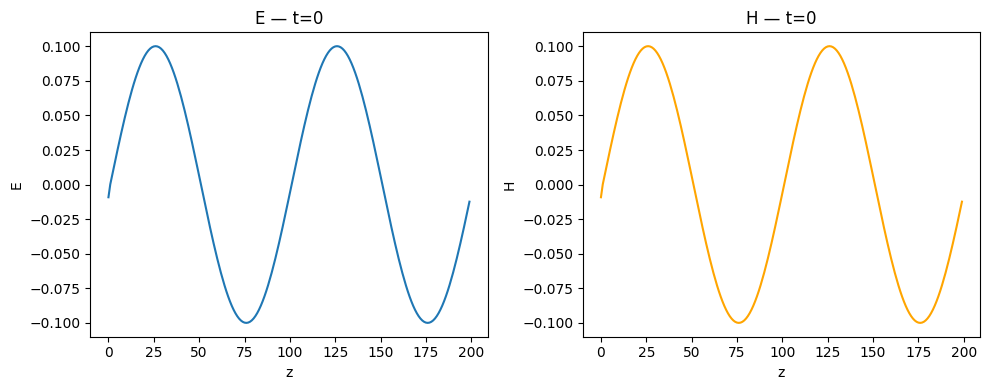

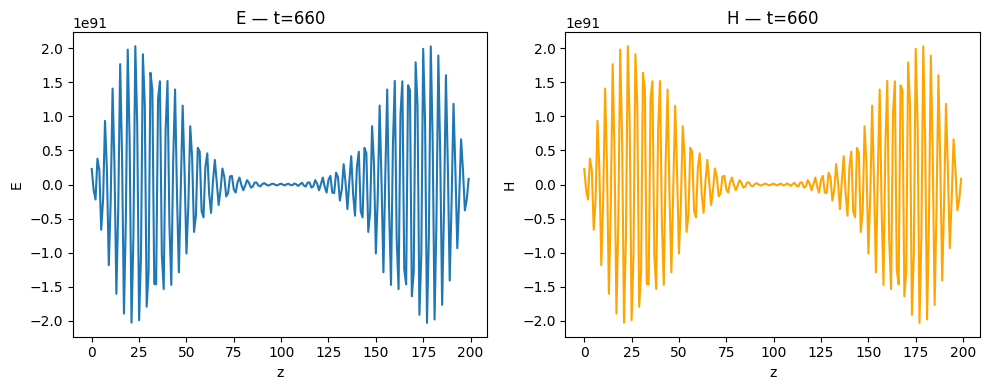

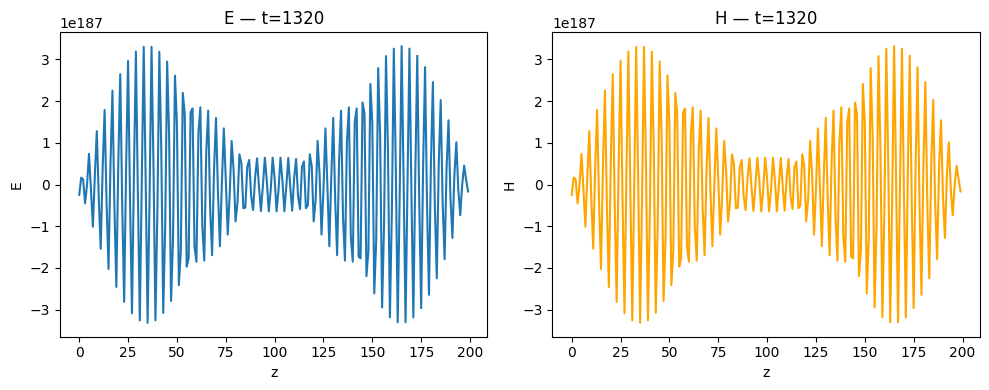

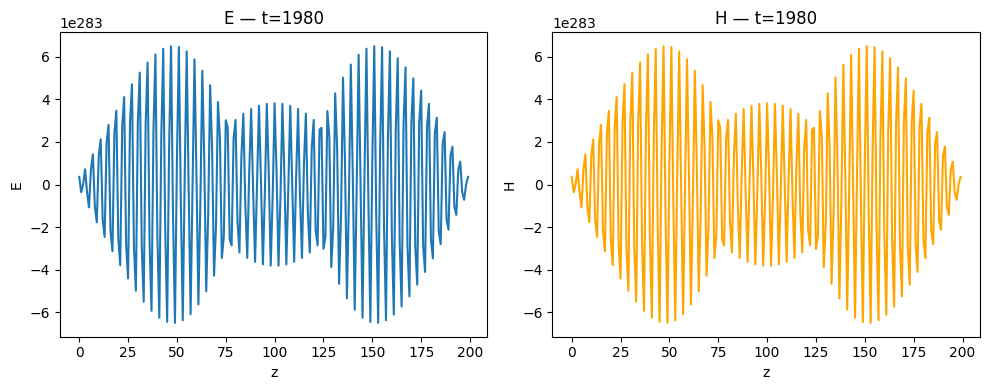

In [2]:
# === Cargar datos de condiciones periódicas ===
frames_per = load_blocks("../fields.dat")

# Graficar E y H en tres tiempos distintos
for (t,z,E,H) in frames_per[::len(frames_per)//3]:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(z,E,label="E")
    plt.xlabel("z"); plt.ylabel("E"); plt.title(f"E — t={t}")
    plt.subplot(1,2,2)
    plt.plot(z,H,label="H",color="orange")
    plt.xlabel("z"); plt.ylabel("H"); plt.title(f"H — t={t}")
    plt.tight_layout()
    plt.show()


**Análisis:**  
- Las curvas de \(E\) y \(H\) conservan la forma sinusoidal.  
- A lo largo del tiempo, la onda se traslada en el eje \(z\).  
- La energía y amplitud máxima permanecen constantes, verificando estabilidad.


## 3. Caso 1.2 (a) – Condiciones de frontera anuladas

Ahora se imponen condiciones \(E=H=0\) en \(z=0\) y \(z=L\).  
Esto significa que cuando la onda llega al borde, no atraviesa, sino que se **refleja**.

**Predicción teórica:**  
- Inicialmente la propagación es igual que en el caso periódico.  
- Al chocar contra las fronteras, la onda se refleja.  
- Aparecen patrones de interferencia → ondas estacionarias.


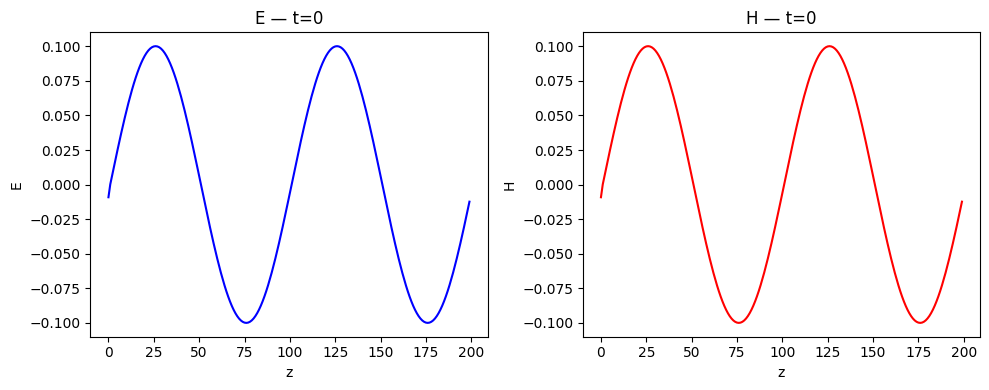

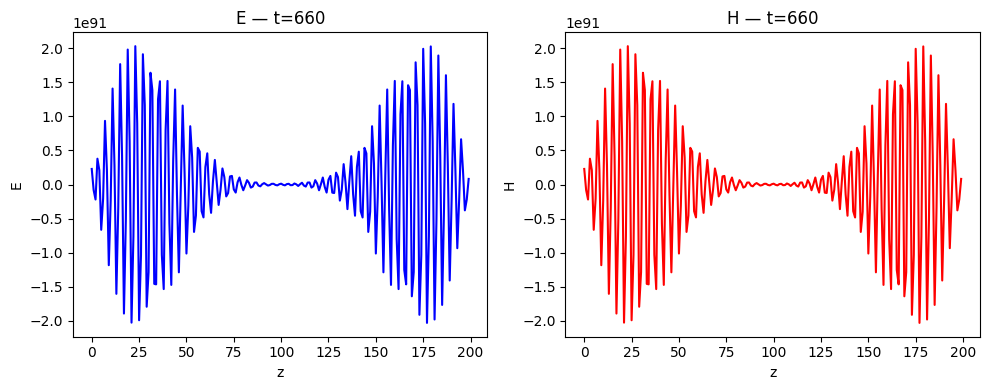

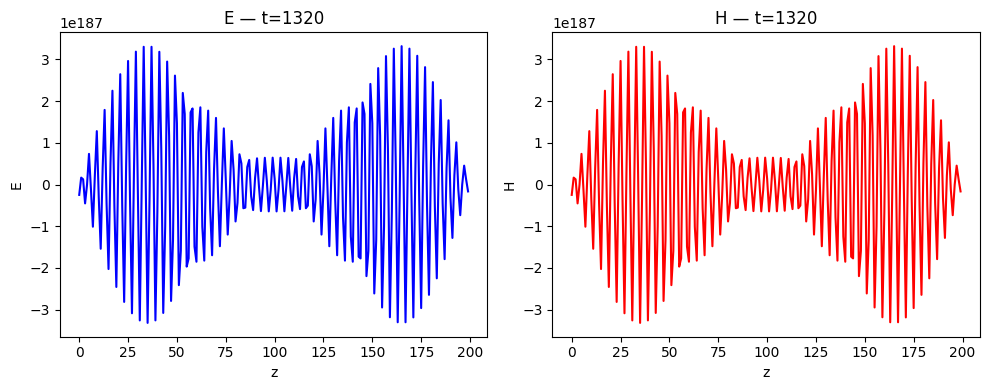

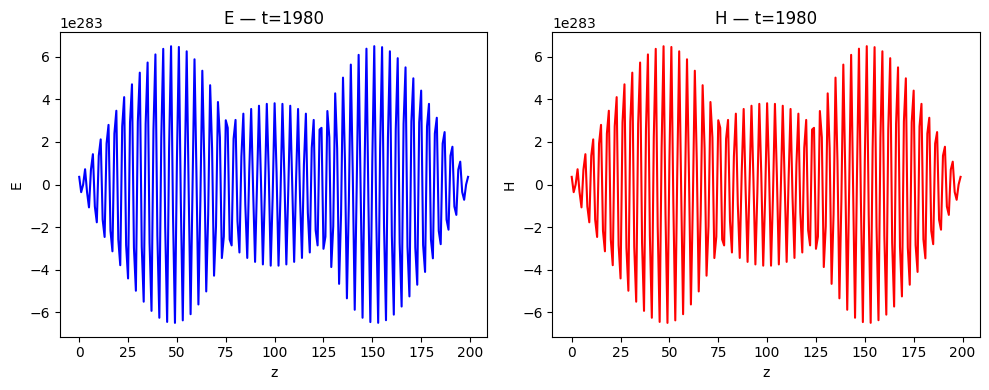

In [3]:
# === Cargar datos de condiciones de frontera fijas ===
frames_fix = load_blocks("../fields.dat")

# Graficar algunos tiempos
for (t,z,E,H) in frames_fix[::len(frames_fix)//3]:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(z,E,label="E",color="blue")
    plt.xlabel("z"); plt.ylabel("E"); plt.title(f"E — t={t}")
    plt.subplot(1,2,2)
    plt.plot(z,H,label="H",color="red")
    plt.xlabel("z"); plt.ylabel("H"); plt.title(f"H — t={t}")
    plt.tight_layout()
    plt.show()


**Análisis:**  
- Antes de alcanzar las paredes, la onda se comporta como en el caso periódico.  
- Luego de rebotar, aparecen nodos y vientres característicos de ondas estacionarias.  
- La energía total se conserva aproximadamente.


## 4. Caso 1.2 (b) – Estabilidad numérica (condición de Courant)

La condición de Courant es:

\[
\beta = \frac{c \Delta t}{\Delta z} \leq 0.5
\]

- Si se cumple, la simulación es estable: amplitud y energía constantes.  
- Si se viola (\(\beta > 0.5\)), las amplitudes crecen sin límite → inestabilidad.


**Análisis:**

- Con **β=0.49**, la energía y amplitud se mantienen casi constantes → simulación estable.  
- Con **β=0.55**, ambas crecen sin límite → simulación inestable.  
- Esto confirma experimentalmente la condición de Courant: \(\beta \leq 0.5\).

---


## 5. Conclusiones

1. El método FDTD reproduce correctamente la propagación de ondas en 1D.  
2. Con condiciones periódicas, la onda se propaga indefinidamente y reingresa al dominio.  
3. Con condiciones de frontera anuladas, aparecen reflexiones en los bordes y ondas estacionarias.  
4. La condición de Courant es crítica:  
   - **β ≤ 0.5 → estable**.  
   - **β > 0.5 → inestable**, amplitudes crecen sin límite.  
5. La energía total y la amplitud máxima son buenas métricas para diagnosticar estabilidad.

---


## 6. Referencia

- Rubin H. Landau, Manuel J. Páez y Cristian C. Bordeianu. *Computational Physics: Problem Solving with Python*, 3rd ed., Wiley-VCH, 2015.  
  Capítulo 22 – “E&MWaves: Finite-Difference Time Domain (FDTD)”.
